# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**'TODO'**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Housing)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [7]:
# Import libraries necessary for this project
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
# 让结果在notebook中显示
%matplotlib inline

# Load the Boston housing dataset
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

#print data.head()
print features.head()
print prices.head()

Boston housing dataset has 489 data points with 4 variables each.
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7
0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64


## 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。**特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。**目标变量**：` 'MEDV'`，是我们希望预测的变量。他们分别被存在`features`和`prices`两个变量名中。

## 练习：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [6]:
# TODO: Minimum price of the data
#目标：计算价值的最小值
minimum_price = np.min(prices)

# TODO: Maximum price of the data
#目标：计算价值的最大值
maximum_price = np.max(prices)

# TODO: Mean price of the data
#目标：计算价值的平均值
mean_price = np.mean(prices)

# TODO: Median price of the data
#目标：计算价值的中值
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#目标：计算价值的标准差
std_price = np.std(prices)

# Show the calculated statistics
#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

**回答: ** 增加'RM'数值，'MEDV'会增加，因为房间数量增加可能意味着房屋面积增加，面积大房子价格自然贵；如果面积一样大，但是房间多，价格也相对高，因为房间多房屋的功能性更好。'LSTAT'数量增加，'MEDV'会减少，因为低收入者比例增加，考虑到低收入者可能买不起贵的房子，这意味着房屋的价格会相对低.增加'PTRATIO' 数值，'MEDV'会增加，因为学生比例增加，意味着这个地区人口多，房价会高一些，同时这些学生的家长正好是有购买力的人群，学生的比例增加，就相当于有购买力的人数增加，会抬高房价

## 建模
在项目的第二部分中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 练习：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination)R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 `r2_score` 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

In [11]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict) 
    print score
    # Return the score
    return score

### 问题2 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你会觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [12]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


**回答:**成功预测了目标变量，预测数值和真实数值已经很接近，并且R^2的数值也表现很好。但是在真实的模型建立中，应该使用更多的数据，5条训练数据太少

### 练习: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重新排序，以消除数据集中由于排序而产生的偏差。
在下面的代码中，你需要：
- 使用 `sklearn.cross_validation` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
- 最终分离出的子集为`X_train`,`X_test`,`y_train`,和`y_test`。

In [16]:
# TODO: Import 'train_test_split'
from sklearn import cross_validation

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### 问题 3- 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

**答案: **因为我们既要用这些数据做训练又要测试，训练是为了得到模型，测试是为了评估模型；如果不按比例划分数据集，全部用于训练可能会导致过拟合，按比例划分数据集不但可以 避免过拟合，而且也可以在独立数据集上进行测试来评估模型。


----

## 分析模型的表现
在项目的第三部分，我们来看一下几个模型针对不同的数据集在学习和测试上的表现。另外，你需要专注于一个特定的算法，用全部训练集训练时，提高它的`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。把你模型的表现画出来对于分析过程十分有益。可视化可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观的显示了随着训练数据量的增加，模型学习曲线的训练评分和测试评分的变化。注意，曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。这个模型的训练和测试部分都使用决定系数R<sup>2</sup>来评分。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

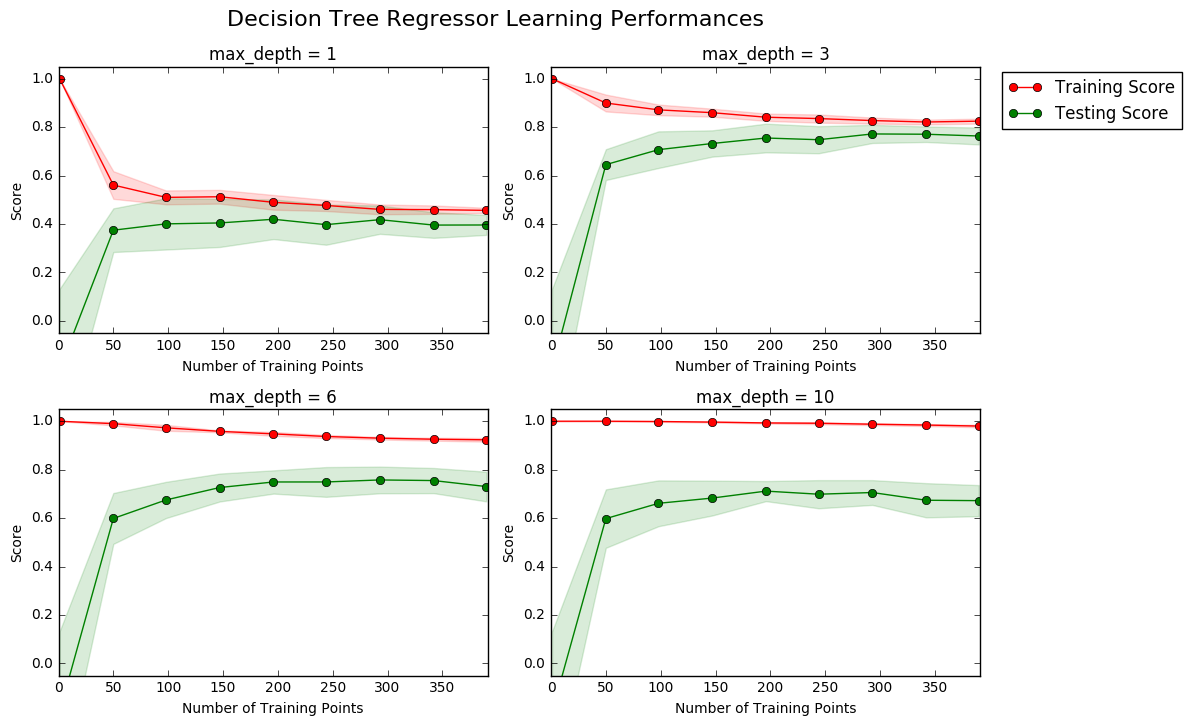

In [17]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### 问题 4 - 学习数据
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练曲线的评分有怎样的变化？测试曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*
**提示：**学习曲线的评分是否最终会收敛到特定的值？

**答案: **上面一行第二个图最大深度是3，随着训练数据的增加它的评分缓慢下降，但当数据超过300时，分数基本不在下降；测试曲线随着数据的增加分数快速增长，当数据超过300时数据趋于稳定；可见学习曲线收敛于0.8左右；这幅图是这四幅图里表现最好的；因为模型已经收敛，所以即使有更多训练数据，模型表现也会趋于稳定，不会提升模型表现

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练的变化，一个是测试的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

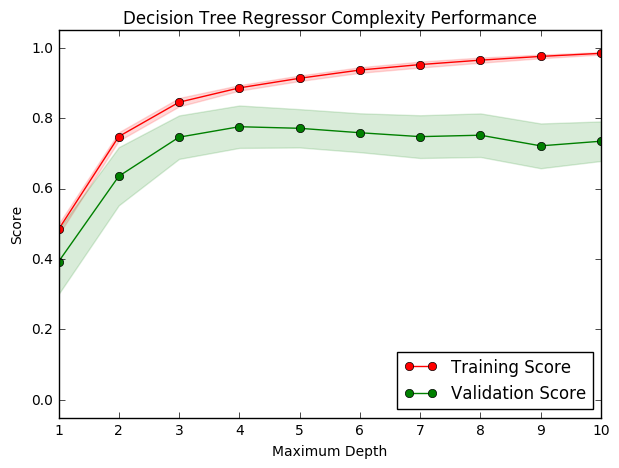

In [18]:
vs.ModelComplexity(X_train, y_train)

### 问题 5- 偏差与方差之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

**答案: ** 当模型以最大深度为1进行训练时出现了很大的偏差，training score 为0.5左右，validation score 为0.4左右，预测值与实际值相差很大。当模型最大深度为10时，方差在缓慢增加，因为training score 和 validation score 之间的差距变大

### 问题 6- 最优模型的猜测
*你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？为什么你会得出了这个答案？*

**答案: **随着最大深度的增加，training score 不断增加，但是validation score当最大深度为4时就不再增加，并呈现缓慢下降的趋势，表示方差再逐渐变大，并且最大深度为4时，training score 为0.9左右，之后training score 增长缓慢，可见最大深度为4就是最价值

-----

## 评价模型表现
在这个项目的最后，你将自己建立模型，并使用最优化的`fit_model`函数，基于客户房子的特征来预测该房屋的价值。

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化学习算法？*


**回答: **通常一个模型有多个参数，如果确定每个参数的取值是很常见的问题，网格是指不同参数不同取值交叉形成的多维网格空间，网格搜索是尝试不同参数不同取值的组合，来取得最佳参数组合。

### 问题 8- 交叉验证
*什么是K折交叉验证法（k-fold cross-validation）？优化模型时，使用这种方法对网格搜索有什么好处？* 

**提示：** 跟为何需要一组训练集的原因差不多，网格搜索时如果不使用交叉验证会有什么问题？

**答案: ** 是指把数据集分成K个子集，选择一个子集用作测试，其它k-1个子集用作训练，交叉验证重复K次，将k次的平均测试结果作为最终结果。这样做好处是每个数据都用作了训练和测试，准确率更高

### 练习：训练模型
在最后一个练习中，你将需要将所学到的内容整合，使用**决策树演算法**训练一个模型。为了保证你得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

此外，你会发现你的实现使用的是 `ShuffleSplit()` 。它也是交叉验证的一种方式（见变量 `'cv_sets'`）。虽然这不是**问题8**中描述的 K-Fold 交叉验证，这个教程验证方法也很有用！这里 `ShuffleSplit()` 会创造十个混洗过的集合，每个集合中20%(`'test_size'`)的数据会被用作**验证集**。当你在实现的时候，想一想这跟 K-Fold 交叉验证有哪些相同点，哪些不同点？

在下方 `fit_model` 函数中，你需要做的是：
- 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数；
  - 将这个回归函数储存到 `'regressor'` 变量中；
- 为 `'max_depth'` 创造一个字典，它的值是从1至10的数组，并储存到 `'params'` 变量中；
- 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
  - 将 `performance_metric` 作为参数传至这个函数中；
  - 将评分函数储存到 `'scoring_fnc'` 变量中；
- 使用 `sklearn.grid_search` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) 创建一个网格搜索对象；
  - 将变量`'regressor'`, `'params'`, `'scoring_fnc'`, 和 `'cv_sets'` 作为参数传至这个对象中；
  - 将 `GridSearchCV` 存到 `'grid'` 变量中。
  
如果有同学对python函数如何传递多个参数不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [36]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 9- 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [35]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.742796350428
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.806953080627
0.730293234059
0.706624908649
0.671853983565
0.763873794047
0.74827346237
0.807889667841
0.759466578679
0.825643801653
0.865175501824
0.813421644752
0.71162726973
0.67093724108
0.67482465242
0.739461995549
0.764473004521
0.780222248068
0.768123795768
0.719565912528
0.829602769105
0.802855255091
0.68289321081
0.62944258342
0.672908125325
0.758818891863
0.790229623771
0.761599798163
0.78221429

**Answer: ** 最优模型的最大深度是4，与问题6中猜测相同

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [37]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**答案: **客户1的房屋销售价格合理$391,183.33，客户2的房屋销售价格合理$189,123.53，客户3的房屋销售价格合理$942,666.67。合理，比如说客户1和客户3比较，他们的学生-老师比例相当，客户3是客户1的房间数量1.6倍，但是价格2倍多，因为客户3所在区域低收入人群比例少很多,有钱人多房价肯定也高出不少.还有基于前面的统计分析，平均价格是$454,342.94,中位数是这与客户1的房屋价格相当,根据前面的分析贫困阶层比例高房价便宜所以,客户2所在趋于价格相对便宜,客户3所在趋于价格贵,这一事实与我们的预测结果相符,所以这样的预测是合理的。

### 敏感度

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [38]:
vs.PredictTrials(features, prices, fit_model, client_data)

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.737907830442
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.806953080627
0.730293234059
0.70706260164
0.671853983565
0.763873794047
0.774274587218
0.807889667841
0.754939096345
0.825643801653
0.865175501824
0.821663417405
0.703806129942
0.673855194355
0.674325600026
0.744816952907
0.781624628129
0.831452885484
0.781866910564
0.711382322792
0.829848900153
0.794943978427
0.707085548361
0.592892613338
0.678204615918
0.751002366702
0.765312428736
0.815419476004
0.783

### 问题 11 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

**提示：** 回答几个问题：
- *1978年所采集的数据，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *模型是否足够健壮来保证预测的一致性？*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*

**答案: **这个模型显然不能用于显示世界中使用。首先对于数据距离现在已经有近40年的时间，货币总量，房屋单价，以及影响房屋的因素都发生了变化，这些数据已经不能作为现在房价的样本来使用；其次数据中特征太少，构建模型过于简单，不足以预测房价，比如所在城市大小，房屋临近地铁，重点学校的学区房，周围社区配套等等都会对房屋价格产生重要影响；其次不同地区的房屋价格模型不一定通用，比如在中国，很大程度上跟当地政府的调控能力有关，或者在另一方面讲不同地区相同特征的重要程度也不尽相同，比如在大城市，临近地铁对房屋价格影响很大，但是相对小一些的城市，如果城市本来的公交和出租车体系很发达，并且城市规模小，这个临近地铁的特征就显得不重要了。